In [9]:

import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [10]:
np.random.seed(0)

n = 100
X, Y = make_classification(n_samples = n, n_features = 2, n_redundant= 0, n_informative=2, flip_y=0.05, class_sep=1.5)

X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [70*n//100]
train_x, test_x = np.split(X, split)
train_labels, test_labels = np.split(Y, split)

In [ ]:
def plot_dataset(features, labels, W=None, b=None):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors,s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:, 0])
        min_y = min(features[:,1])*(1 - 0.1)
        max_y = max(features[:,1])*(1 + 0.1)
        cx = np.array([min_x,max_x], dtype=np.float32)
        cy = (0.5-W[0]*cx-b/W[1])
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11460\1446224291.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


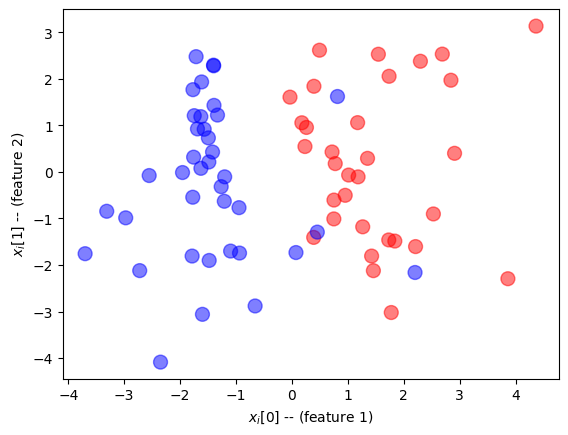

In [ ]:
plot_dataset(train_x, train_labels)

In [ ]:
train_x_norm = (train_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))
test_x_norm = (test_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))